## Taxi

Ejercicio 3

### Setup

In [1]:
import gymnasium as gym
from utils import Episode, Experiment, gym_interpreter1
from agents import Agent
from algoritmos import *


env = gym.make('Taxi-v3',
               render_mode = 'rgb_array')

class Q_learning(Agent) :
    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False
   
    def update(self, next_state, reward, done):

        # obtain previous state
        state = self.states[-1] # Aquí estado previo
        # obtain previous action
        action = self.actions[-1]
        # Find bootstrap
        maxQ = self.max_Q(next_state) 
        estimate = reward + (self.parameters['gamma'] * maxQ) # Calcula el estimado
        # Obtain delta
        delta = estimate - self.Q[state, action] # Calcula el delta
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = self.Q[state, action] + (self.alpha * delta) # Actualiza el valor
        # Update policy
        self.update_policy(state) # Actualizar la política en el estado        
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}') 

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pre-Entreno

In [2]:
parameters = {
    'nS': 500,
    'nA': 6,
    'gamma': 0.99,
    'epsilon': 0.005,
    'alpha': 0.33,
}

agenteQ = Q_learning(parameters=parameters)

Moviepy - Building video d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_sin_entrenar/rl-video-episode-0.mp4.
Moviepy - Writing video d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_sin_entrenar/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_sin_entrenar/rl-video-episode-0.mp4


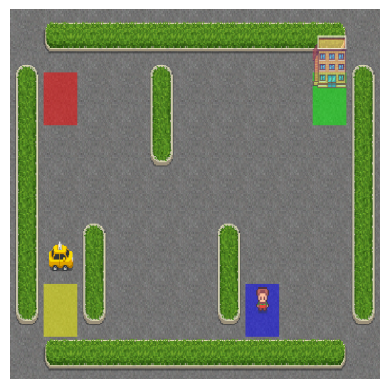

In [3]:
episodio = Episode(environment=env,\
                   env_name='Taxi',\
                   agent=agenteQ,\
                   model_name='Q-Sin-Entrenar',\
                   num_rounds=20, \
                   state_interpreter=gym_interpreter1)
episodio.renderize(to_video=True, file='taxi_sin_entrenar')

## Entrenamiento

In [4]:
def Entrenar(env, nombreAmbiente, nombreAgente, agente, numSimulaciones, numEpisodios, numRondas, learn, measures):
    from tqdm.auto import tqdm
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from seaborn import lineplot, histplot, heatmap, color_palette
    from plot_utils import Plot

    data_frames = []
    # Run simulations
    for k in tqdm(range(numSimulaciones), desc='Running simulations'):
        # Reset all agents
        if learn:
            agente.reset()
        # Iterate over episodes
        for ep in tqdm(range(numEpisodios), desc='\tRunning episodes', leave=False):
            # Initialize Episode
            sim = Episode(environment=env, \
                            env_name=nombreAmbiente, \
                            agent=agente, \
                            model_name=nombreAgente,\
                            num_rounds=numRondas,
                            state_interpreter=gym_interpreter1)
            # Keep a unique id number for the episode
            sim.id = ep
            # Run episode over agent
            df = sim.run(verbose=False, learn=learn)
            df["simulation"] = k
            df["model"] = nombreAgente
            data_frames.append(df)
    # Consolidate data
    data = pd.concat(data_frames, ignore_index=True)
    # Create plots
    for m in measures:
        if m == 'reward':
            ax = Plot(data).plot_rewards(m)
        if m == 'round_reward':
            ax = Plot(data).plot_round_reward(m)
        if m == 'hist_reward':
            ax = Plot(data).plot_histogram_rewards(m)
        try:
            ax.set_title(m)
        except:
            pass
        plt.show()

Running simulations: 100%|██████████| 1/1 [00:21<00:00, 21.97s/it]


Average sum of rewards:
 model
Q_learning    3.0976
Name: reward, dtype: float64

Episode termination percentage:
 model
Q_learning    99.39
Name: done, dtype: float64


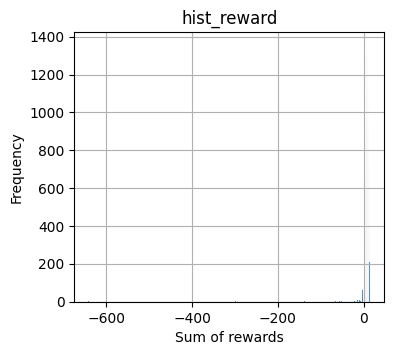

In [5]:
Entrenar(env, 'Taxi', 'Q_learning', agenteQ, 1, 10000, 200, True, ['hist_reward'])

## Entrenado

Running simulations: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


Average sum of rewards:
 model
Q_learning_Bueno    7.05
Name: reward, dtype: float64

Episode termination percentage:
 model
Q_learning_Bueno    100.0
Name: done, dtype: float64


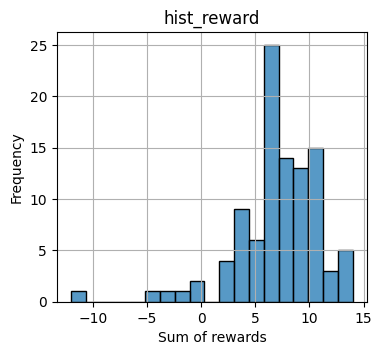

In [6]:
Entrenar(env, 'Taxi', 'Q_learning_Bueno', agenteQ, 1, 100, 100, False, ['hist_reward'])

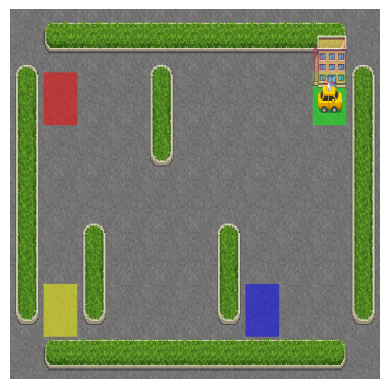

Moviepy - Building video d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_entrenado/rl-video-episode-0.mp4.
Moviepy - Writing video d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_entrenado/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Users\Usuario\Desktop\Jero\Universidad\Semestre IV\IA\Proyecto 3\Gym\taxi_entrenado/rl-video-episode-0.mp4


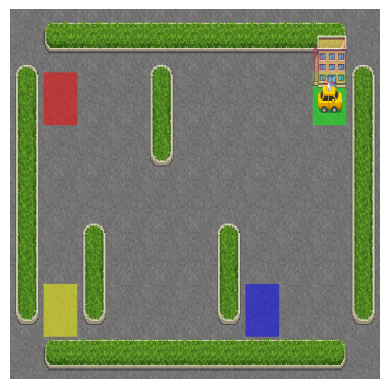

In [7]:
episodio = Episode(environment=env,\
                   env_name='Taxi',\
                   agent=agenteQ,\
                   model_name='Q_Learning_Entrenado',\
                   num_rounds=50, \
                   state_interpreter=gym_interpreter1)

episodio.renderize(to_video=True, file='taxi_entrenado')